In [76]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as classificationreport

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances

from pandas_profiling import ProfileReport
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

In [77]:
# 1. Analisis del problema

# Se tiene el dataset: https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/main/credit_default.csv
# Proveniente de: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


# Se quiere predecir quien dejará de pagar su crédito 'default'
# 
# Tenemos 23 features: variables independientes entre ellas:
# ['limit', 'edu', 'married', 'age', 'apr_delay', 'may_delay', 'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay']
# ['sex']
# Tenemos 1 feature  Dependiente 'default'  si dejó de pagar su credito o no.  (La que se va a predecir).
# algunas features son numericas, otras son categorias.
# Queremos predecir una categoría (Si o NO),
# Entonces Este es un problema de CLASIFICACION
# Usamos modelos de clasificacion como: 
# [GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=1000), GaussianNB() ]


In [78]:
# 2. Importar el dataset
def load_data(input_data, upsampled=False):
  df=pd.read_csv(input_data)
  return df 

input_data='https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/main/credit_default.csv'
df=load_data(input_data)


In [79]:
# 3. Data Analysis
#Check data
df.head()

,default,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,1,20000,M,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,120000,M,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,M,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,M,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,F,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [80]:
#get column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   default    30000 non-null  int64 
 1   limit      30000 non-null  int64 
 2   sex        30000 non-null  object
 3   edu        30000 non-null  int64 
 4   married    30000 non-null  int64 
 5   age        30000 non-null  int64 
 6   apr_delay  30000 non-null  int64 
 7   may_delay  30000 non-null  int64 
 8   jun_delay  30000 non-null  int64 
 9   jul_delay  30000 non-null  int64 
 10  aug_delay  30000 non-null  int64 
 11  sep_delay  30000 non-null  int64 
 12  apr_bill   30000 non-null  int64 
 13  may_bill   30000 non-null  int64 
 14  jun_bill   30000 non-null  int64 
 15  jul_bill   30000 non-null  int64 
 16  aug_bill   30000 non-null  int64 
 17  sep_bill   30000 non-null  int64 
 18  apr_pay    30000 non-null  int64 
 19  may_pay    30000 non-null  int64 
 20  jun_pay    30000 non-null  i

In [81]:
#get Statistics
df.describe()

,default,limit,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.221200,167484.322667,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.415062,129747.661567,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,1000000.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [82]:
# determine the target variable
# In this case is the default of obligation (incumplimiento de pago) with values 0 and 1.
# this will be the first column (0)
target_var='default'

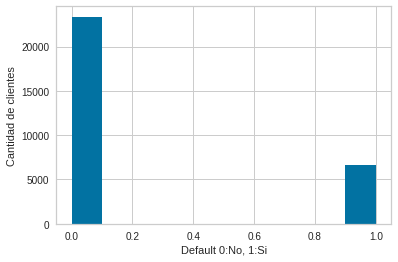

In [83]:
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for the yeo-johnson transformation
import scipy.stats as stats


def dibuja_histograma( data, target_var , ylabel, xlabel):
  data[target_var].hist(bins=10) 
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

dibuja_histograma(df, target_var, 'Cantidad de clientes', 'Default 0:No, 1:Si')

In [84]:
#Data wrangling

def clasifica_variables( data, target_var):
  cat_vars = [var for var in data.columns if data[var].dtype == 'O']
  num_vars = [var for var in data.columns if var not in cat_vars and var != target_var]
  return cat_vars, num_vars

cat_vars, num_vars=clasifica_variables(df,target_var)
print('Numeric Features: ' + str(num_vars))
print('Category Features:'+ str(cat_vars))

Numeric Features: ['limit', 'edu', 'married', 'age', 'apr_delay', 'may_delay', 'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay']
Category Features:['sex']


In [85]:
#Data wrangling
#We notice 'sex' is an object feature, so we need to convert it to a numeric one.
df['sex'].value_counts()



M    18112
F    11888
Name: sex, dtype: int64

In [86]:
#Change [F,M]  -> [1,2]
def apply_mappings(df):
  var='sex'
  qual_mappings = {'F': 1, 'M': 2}
  df[var] = df[var].map(qual_mappings)
  return df
df=apply_mappings(df)

In [87]:
#Verify result
df['sex'].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [88]:
#check the df again 
#df.info()#
cat_vars, num_vars=clasifica_variables(df,target_var)
print('Numeric Features: ' + str(num_vars))
print('Category Features:'+ str(cat_vars))

Numeric Features: ['limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay', 'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay']
Category Features:[]


In [89]:
#There are no Category features, so may we proceed.

Distribuciones Variables continuas:
Variables discretas:  9
Variables continuas:  14


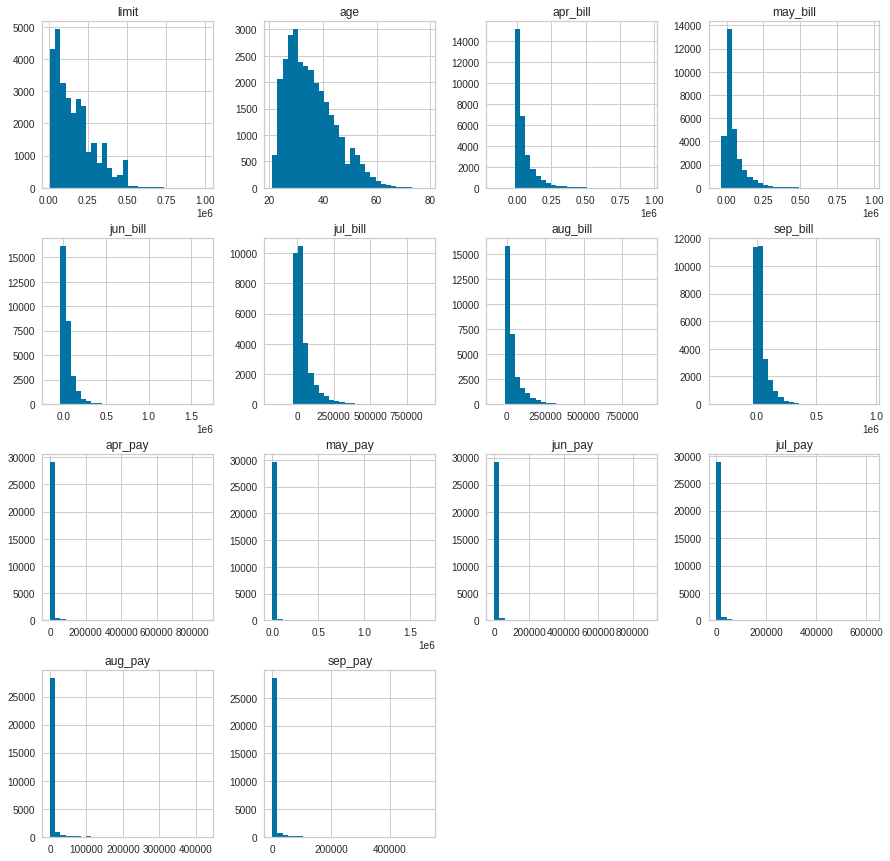

In [90]:
# Plot Distributions

def get_discrete_vars(data, year_vars, num_vars):
    #  let's male a list of discrete variables
    discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]
    print('Variables discretas: ', len(discrete_vars))
    return discrete_vars

def get_continous_vars(data, year_vars, num_vars, discrete_vars):
    # make list of continuous variables
    cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]
    print('Variables continuas: ', len(cont_vars))    
    return cont_vars

def plot_continous_vars(data, cont_vars ):
    data[cont_vars].hist(bins=30, figsize=(15,15))
    plt.show()

print("Distribuciones Variables continuas:")
year_vars=[]
discrete_vars=get_discrete_vars(df,year_vars, num_vars)
cont_vars=get_continous_vars(df, year_vars, num_vars, discrete_vars)
plot_continous_vars(df, cont_vars)


Distribuciones variables discretas
Variables discretas:


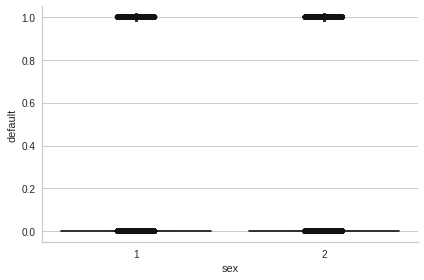

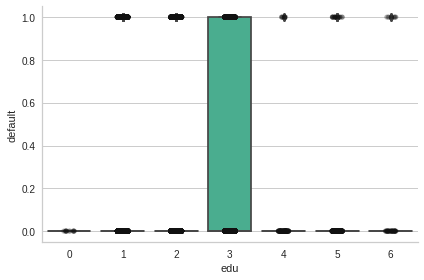

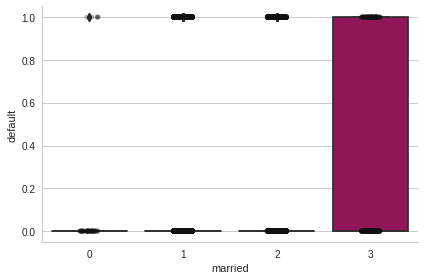

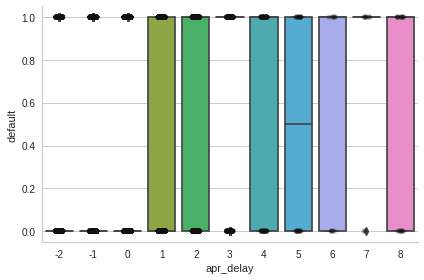

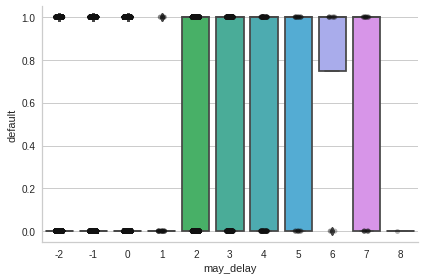

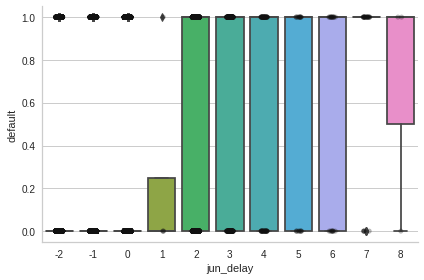

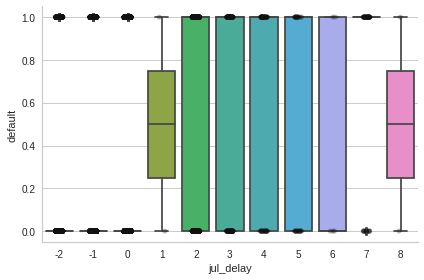

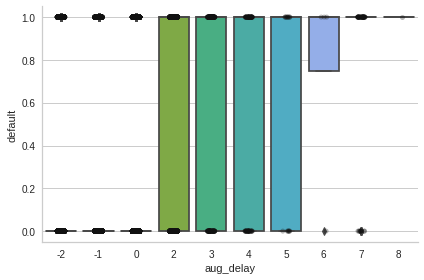

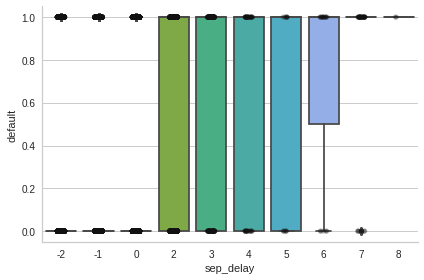

In [91]:
print("Distribuciones variables discretas")
def plot_discrete_vars(data, discrete_vars, target_var):
    for var in discrete_vars:
        # make boxplot with Catplot
        sns.catplot(x=var, y=target_var, data=data, kind="box", height=4, aspect=1.5)
        # add data points to boxplot with stripplot
        sns.stripplot(x=var, y=target_var, data=data, jitter=0.1, alpha=0.3, color='k')
        plt.show()

print("Variables discretas:")
plot_discrete_vars(df, discrete_vars, target_var)

In [92]:
#Define models to check
MODELS = [GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=1000), GaussianNB() ]

In [93]:
# 4. Feature Engineering: Definicion de variables independientes(X):features  y dependiente (y): target
target = df.columns[0]
features = [col for col in df.columns if col not in target]
  

# 5. Partir el dataset en TRAINING y TEST
# 
#Split the data:
def split_data(df):
  #show_df(df)
  target = df.columns[0]
  features = [col for col in df.columns if col not in target]
  X = df[features].values
  y = df[target].values
  labels = df[target].unique().tolist()
  labels.sort()

  train_df, test_df = train_test_split(df, test_size = .30, random_state=42)
  X_train = train_df[features].values
  y_train = train_df[target].values
  X_test = test_df[features].values
  y_test = test_df[target].values
  return labels, features, target, X_train, X_test, y_train, y_test

labels, features, target, X_train, X_test, y_train, y_test = split_data(df)

In [94]:
#Check status:
print('Size of train dataset:'+ str(X_train.shape))
print('Size of test dataset:'+ str(X_test.shape))
print('Features:'+ str(features))
print('Target:'+ target_var)

Size of train dataset:(21000, 23)
Size of test dataset:(9000, 23)
Features:['limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay', 'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay']
Target:default


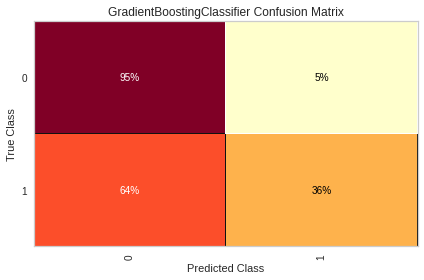

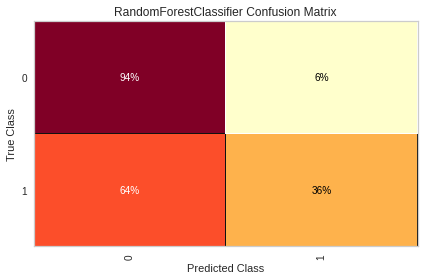

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


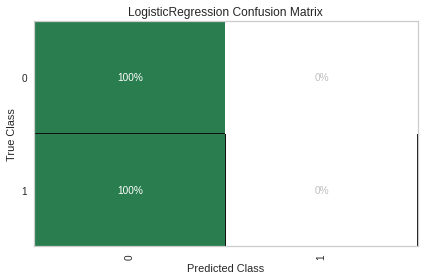

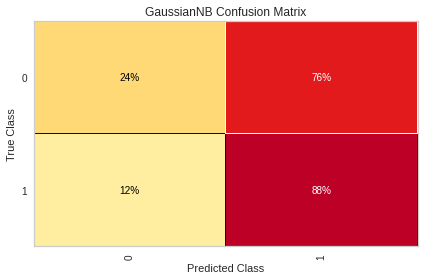

In [95]:
# 6. Entrenamiento

#train the models and compare them
%matplotlib inline
def train(model, X_train, y_train, X_test, y_test, labels):
  full_report=False
  model.fit(X_train, y_train)

  # 7. Hacer predicciones de prueba
  y_pred = model.predict(X_test)
  report = classificationreport(y_test, y_pred, target_names= ["0", "1"], output_dict=True)

  # 8. Calcular el score del modelo
  score=model.score(X_test,y_test)

  if full_report:
    vizualizer = ClassificationReport(model, classes=labels, support=True)
    vizualizer.fit(X_train, y_train)
    vizualizer.score(X_test, y_test)
    vizualizer.show();

    visualizer = ROCAUC(model, classes=labels, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

    visualizer=PrecisionRecallCurve(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();
    #print(model)
    if str(model) != "GaussianNB()":
      visualizer = FeatureImportances(model)
      visualizer.fit(X_train, y_train)
      visualizer.show();

  # 9. Visualizar el resultado de la prueba
  cm = ConfusionMatrix(
    model, classes=labels,
    percent=True
  )
  cm.fit(X_train, y_train)
  cm.score(X_test, y_test)
  cm.show();
  return model , score

def train_all_models(X_train, y_train,X_test,y_test, labels):
  scores={}
  models=[]
  for model  in MODELS:
    m,s =train(model,X_train, y_train, X_test, y_test , labels)
    scores[model]=s
    models.append(m)
  return scores
    
scores=train_all_models(X_train, y_train,X_test,y_test, labels)


In [96]:
#Print scores:

print("Accuracy scores:")
# print each data item.
for key, value in scores.items():
    score = value
    print("{:<10}   :  {:<10}".format(str(key), score))
#print(scores)

Accuracy scores:
GradientBoostingClassifier()   :  0.8211111111111111
RandomForestClassifier()   :  0.8144444444444444
LogisticRegression(max_iter=1000)   :  0.7822222222222223
GaussianNB()   :  0.37777777777777777


In [97]:
#10 Conclusiones

#Conclusions
#The best accuracy score is 0.82, so the GradientBoostingClassifier is the selected model.

